In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from torch.utils.data import DataLoader, TensorDataset

In [2]:
imgs = torch.load("all_imgs.pt")

In [3]:
imgs = imgs.squeeze(1)

In [4]:
imgs.shape

torch.Size([400, 76, 77])

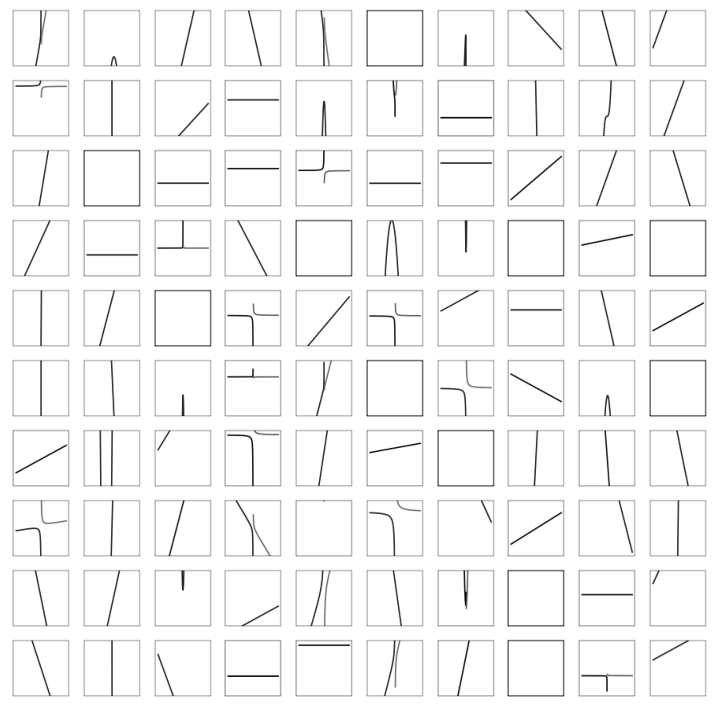

In [5]:
# num_samples = 25
sample_imgs = [i for i in imgs]

fig = plt.figure(figsize=(9, 9))
grid = ImageGrid(fig, 111, nrows_ncols=(10,10), axes_pad=0.1)

for ax, im in zip(grid, sample_imgs):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
plt.show()

In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

mps


In [7]:
dataset = TensorDataset(imgs)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(76 * 77, 64),
            nn.ReLU(),
            nn.Linear(64, 76 * 77),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(-1, 76*77)
        logits = self.linear_relu_stack(x)
        return logits

In [9]:
model = NeuralNetwork().to(device)

In [10]:
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5852, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=5852, bias=True)
    (3): Sigmoid()
  )
)


In [23]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [24]:
def train(data, model, loss_fn, optimizer, id):
    size = len(data)
    model.train()
    loss_total = 0

    for x in dataloader:
        x = x[0].to(device)
        
        pred = model(x)
        loss = loss_fn(pred, x.view(-1, 76*77))
        loss_total += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if (id % 50 == 0):
        print(loss_total)
    

In [25]:
train(imgs, model, loss_fn, optimizer, 1)

In [26]:
for i in range(1000):
    train(imgs, model, loss_fn, optimizer, i)

0.1460170652717352
0.1370522305369377
0.13693372067064047
0.13734500389546156
0.13714742939919233
0.13739332370460033
0.1372529622167349
0.13699309527873993
0.13685724884271622
0.13709575403481722
0.13733539916574955


KeyboardInterrupt: 

In [27]:
pred = model(imgs[0].to(device))

In [28]:
pred.view(76,77)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='mps:0',
       grad_fn=<ViewBackward0>)

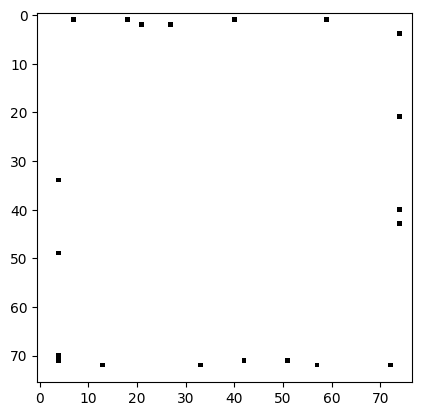

In [29]:
plt.imshow(pred.view(76,77).to("cpu").detach().numpy(), cmap='gray')

In [19]:
imgs = torch.load("all_imgs.pt")

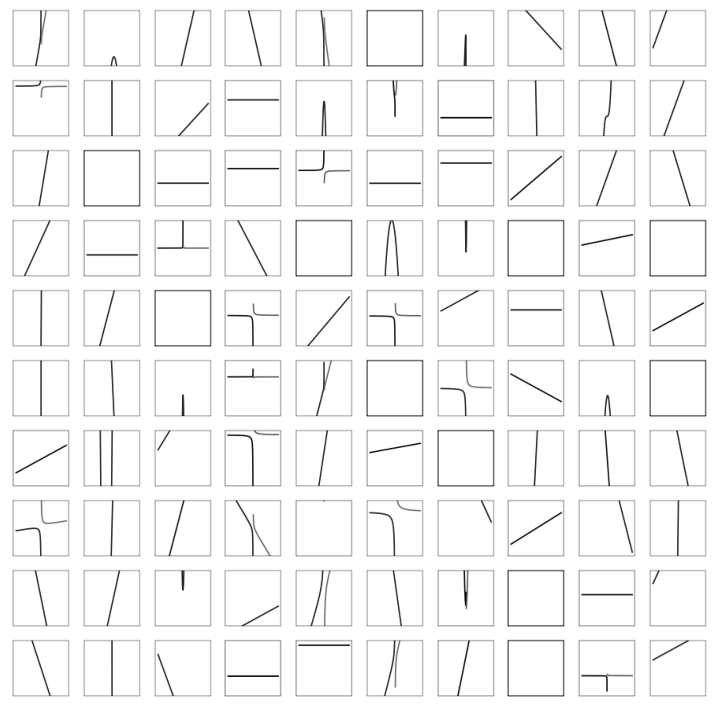